In [1]:
import configparser
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('..')

from data.data_util import select_index, categorize_age

config = configparser.ConfigParser()
config.read("../config.ini")

['../config.ini']

In [2]:
dataset = 'chexpert'
id = "41a2a54f-695b-479e-b5e0-81e5885ef07d"
number_cluster_pca = 22
number_cluster_tsne = 24

In [3]:
tsne = np.load(f"{config['general']['experiment_dir']}/{id}/tsne_{dataset}_{id}.npy")
tsne.shape

(45046, 2)

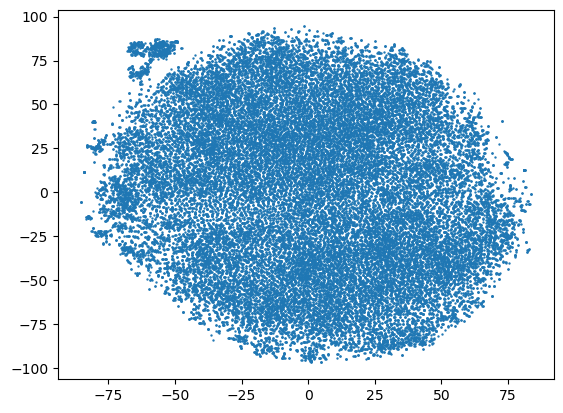

In [4]:
plt.scatter(tsne[:, 0], tsne[:, 1], s=0.5)
plt.show()

In [5]:
data = pd.read_csv(f"{config[dataset]['labels']}")
data = select_index(data, id, dataset, tsne)
data = categorize_age(data, 'Age')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

Text(37.597222222222214, 0.5, 't-SNE Dimension 2')

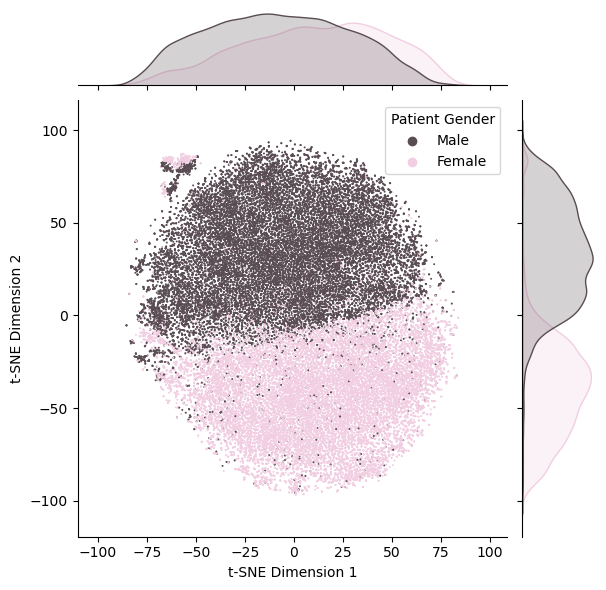

In [6]:
sex_map = {'Female': 'Female', 'Male': 'Male'}
data['Patient Gender'] = data['Sex'].map(sex_map)

# plot tsne with female and masculine
sns.jointplot(x="tsne_0", y="tsne_1",
                hue="Patient Gender",
                palette=['#594C53', '#F2CEE2'],
                sizes=(1, 8), linewidth=0,
                s=2,
                data=data)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

(-100.0, 100.0)

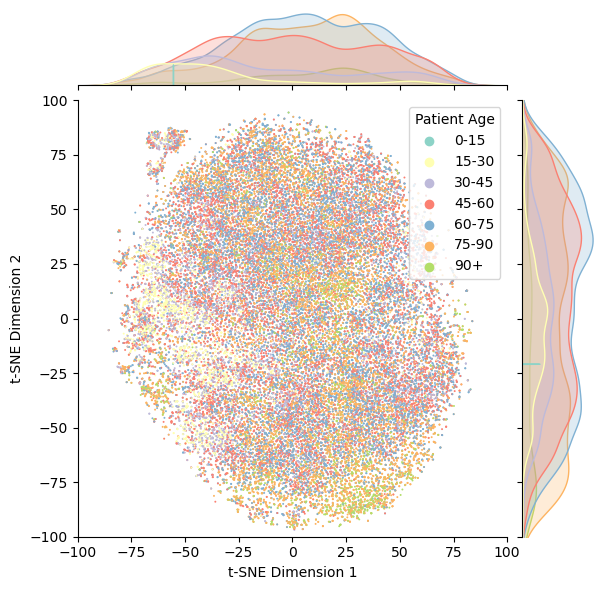

In [7]:
# plot tsne with female and masculine
age_categories_order = ['0-15', '15-30', '30-45', '45-60', '60-75', '75-90', '90+']

sns.jointplot(x="tsne_0", y="tsne_1",
                hue="Patient Age Categorized",
                hue_order=age_categories_order,
                palette='Set3',
                sizes=(1, 8), linewidth=0,
                s=2,
                data=data)

plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Patient Age')
plt.xlim(-100, 100)
plt.ylim(-100, 100)

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

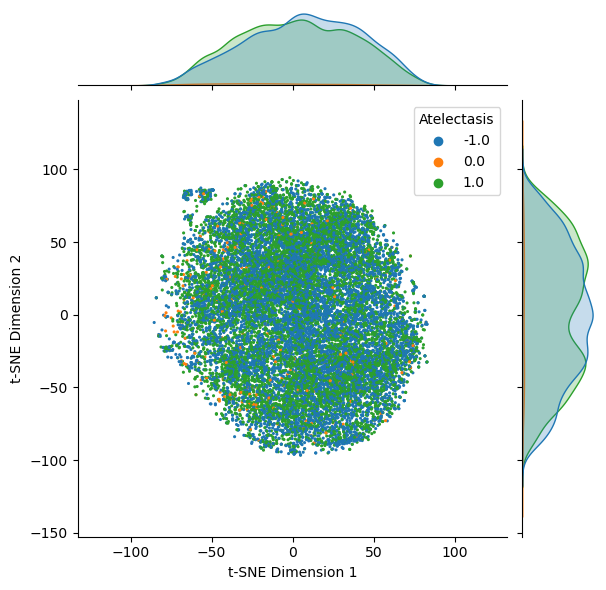

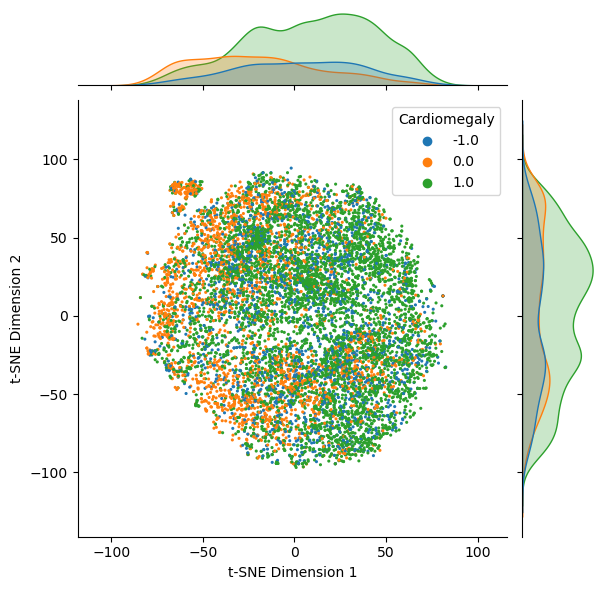

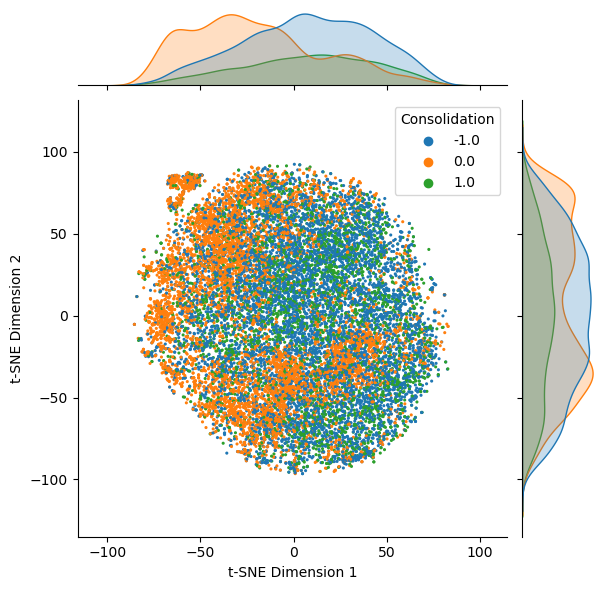

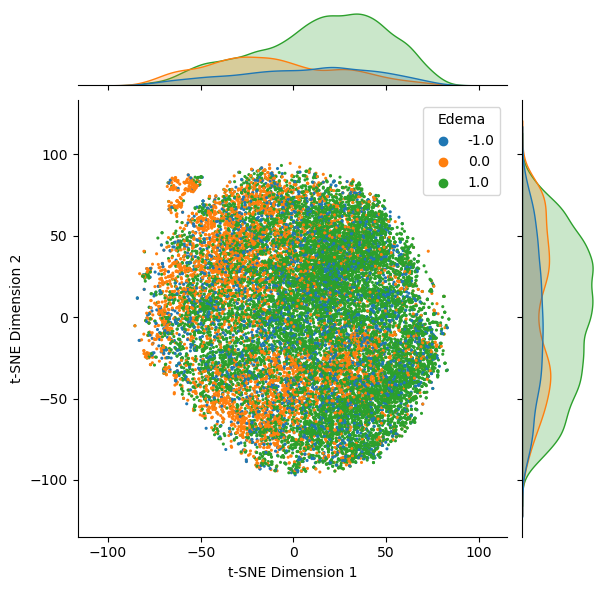

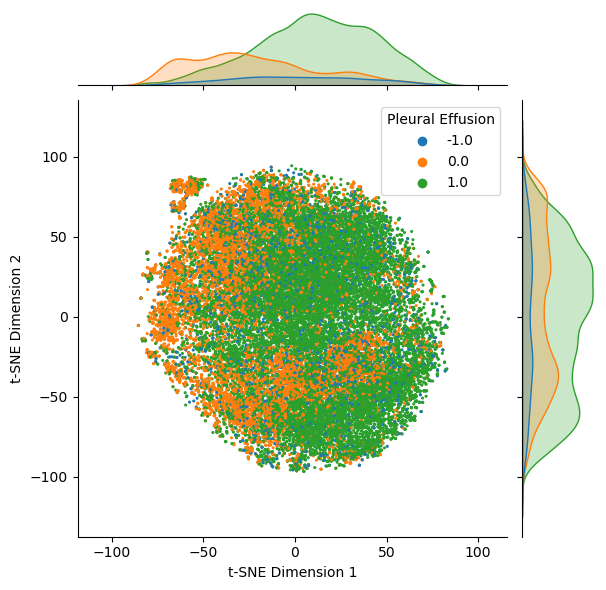

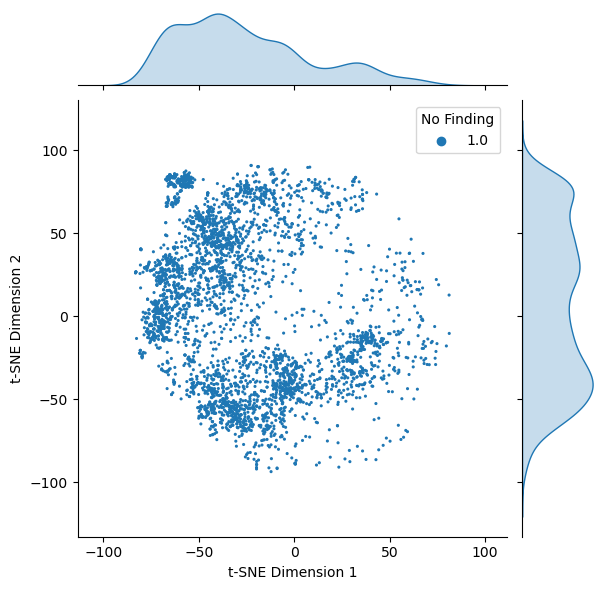

In [8]:
sickness = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Pleural Effusion', 'No Finding']

for s in sickness:
    # plot tsne with female and masculine
    sns.jointplot(x="tsne_0", y="tsne_1",
                    hue=s,
                    palette="tab10",
                    sizes=(1, 8), linewidth=0,
                    s=5,
                    data=data)
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')